In [1]:
# username = 'kimteespk'
# repository = 'realtime-ml-kafka-crypto'
# git_token = ''
# !git clone https://github.com/kimteespk/realtime-ml-kafka-crypto.git

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit

import sklearn
from sklearn.model_selection import train_test_split

import os

import matplotlib.dates as mdates

In [3]:
from get_ticker import get_ccxt_data

In [4]:
df_eth_raw = get_ccxt_data('ETHUSDT', tf= '1m').set_index('timestamp')
df_bnb_raw = get_ccxt_data('BNBUSDT', tf= '1m').set_index('timestamp')


In [6]:
df_eth = df_eth_raw.copy()
df_bnb = df_bnb_raw.copy()

In [7]:
# df_eth = get_ccxt_data('ETHUSDT', tf= '1m').set_index('timestamp')
# df_bnb = get_ccxt_data('BNBUSDT', tf= '1m').set_index('timestamp')

df_eth['close'] = df_eth['close'].shift(-3)
df_bnb['close'] = df_bnb['close'].shift(-3)

df_eth.dropna(inplace= True)
df_bnb.dropna(inplace= True)

eth_x = df_eth.drop(['close'], axis= 'columns')
eth_y = pd.DataFrame(df_eth['close'])

In [8]:
# eth_x = eth_x.dropna()
# eth_y = eth_y.dropna()

train_size = int(len(eth_x) * 0.8)
test_size =int(len(eth_x) - train_size)
print('Train size :', train_size)
print('Test size :', test_size)

Train size : 797
Test size : 200


In [9]:
# eth_x = eth_x.dropna()
# eth_y = eth_y.dropna()



X_train = eth_x[:train_size]
X_test = eth_x[train_size:]

y_train = eth_y[:train_size]
y_test = eth_y[train_size:]


In [10]:
train_ind = list(eth_x[:train_size].index)
test_ind = list(eth_x[train_size:].index)

In [11]:
aim = ['close']

In [12]:
import numpy as np

def normalise_zero_base(continuous):
    try:
        return continuous / (continuous.iloc[0] + 2)
    except IndexError:
        print("Error: Indexing issue. Check the size of your NumPy array.")
        return continuous


In [13]:
X_train = normalise_zero_base(X_train)
X_test = normalise_zero_base(X_test)
y_train = normalise_zero_base(y_train)
y_test = normalise_zero_base(y_test)

In [14]:
import numpy as np
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test,axis=1)

In [15]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau  # Import callbacks

np.random.seed(64)

rnn_neurons = 256  # Adjust neurons for RNN
epochs = 20
batch_size = 25
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

# Define callbacks (unchanged)
checkpoint_filepath = "./ETH_callback/ETHmodel_epoch.h5"
early_stop_patience = 15
reduce_lr_patience = 4
callbacks = [
    EarlyStopping(monitor='val_accuracy', mode='max', patience=early_stop_patience, verbose=1),
    ModelCheckpoint(checkpoint_filepath, monitor='val_loss', mode='min', save_best_only=True, save_weights_only=False, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=reduce_lr_patience, min_lr=0.005, verbose=1)
]

def build_rnn_model(input_data, output_size, neurons, activ_func='tanh',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(SimpleRNN(neurons, activation=activ_func, return_sequences=True))  # Use SimpleRNN
    model.add(SimpleRNN(neurons, activation=activ_func, return_sequences=True))  # Use SimpleRNN
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Activation(activ_func))
    # model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model, callbacks

# Build and train the model (unchanged)
model, callbacks = build_rnn_model(X_train, output_size=1, neurons=rnn_neurons, dropout=dropout, loss=loss, optimizer=optimizer)
modelfit = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                      validation_data=(X_test, y_test), shuffle=False, verbose=1, callbacks=callbacks)



Epoch 1/20


30/32 [===========================>..] - ETA: 0s - loss: 0.2387 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 0.19333, saving model to ./ETH_callback\ETHmodel_epoch.h5
32/32 [==============================] - 3s 18ms/step - loss: 0.2361 - accuracy: 0.0000e+00 - val_loss: 0.1933 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/20
18/32 [===============>..............] - ETA: 0s - loss: 0.1839 - accuracy: 0.0000e+00
Epoch 2: val_loss improved from 0.19333 to 0.15710, saving model to ./ETH_callback\ETHmodel_epoch.h5
32/32 [==============================] - 0s 5ms/step - loss: 0.1761 - accuracy: 0.0000e+00 - val_loss: 0.1571 - val_accuracy: 0.0000e+00 - lr: 0.0010


e:\DADS\DADS6005_Realtime_Analytics\realtime-ml-kafka-crypto\env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 3/20
18/32 [===============>..............] - ETA: 0s - loss: 0.1475 - accuracy: 0.0000e+00
Epoch 3: val_loss improved from 0.15710 to 0.12106, saving model to ./ETH_callback\ETHmodel_epoch.h5
32/32 [==============================] - 0s 5ms/step - loss: 0.1397 - accuracy: 0.0000e+00 - val_loss: 0.1211 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/20
19/32 [================>.............] - ETA: 0s - loss: 0.1114 - accuracy: 0.0000e+00
Epoch 4: val_loss improved from 0.12106 to 0.08940, saving model to ./ETH_callback\ETHmodel_epoch.h5
32/32 [==============================] - 0s 5ms/step - loss: 0.1050 - accuracy: 0.0000e+00 - val_loss: 0.0894 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/20
20/32 [=================>............] - ETA: 0s - loss: 0.0817 - accuracy: 0.0000e+00
Epoch 5: val_loss improved from 0.08940 to 0.06689, saving model to ./ETH_callback\ETHmodel_epoch.h5
32/32 [==============================] - 0s 5ms/step - loss: 0.0776 - accuracy: 0.0000e+00 - val_loss: 

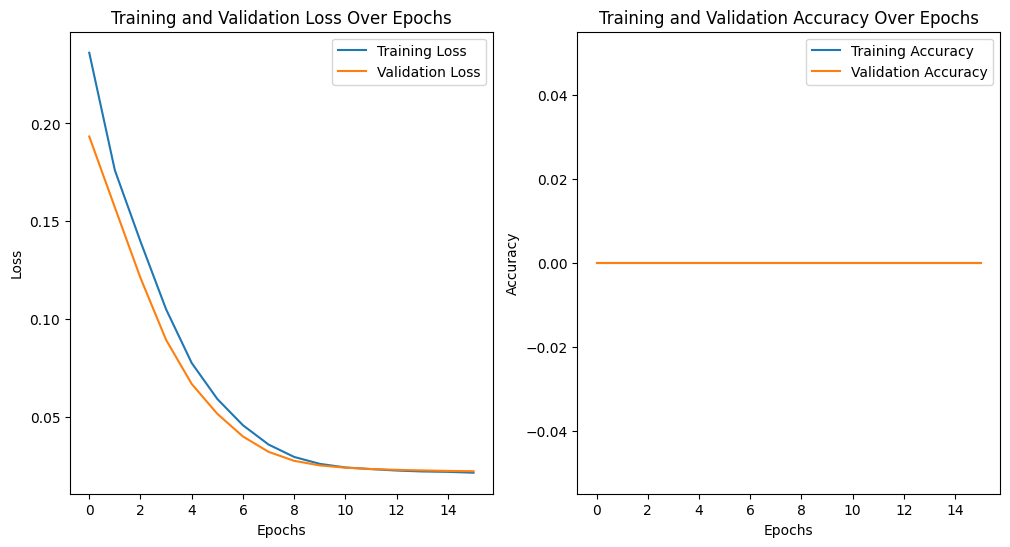

In [16]:
train_loss = modelfit.history['loss']
val_loss = modelfit.history['val_loss']
train_acc = modelfit.history['accuracy']
val_acc = modelfit.history['val_accuracy']
# Create a plot for training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Create a plot for training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Display the plots
plt.show()

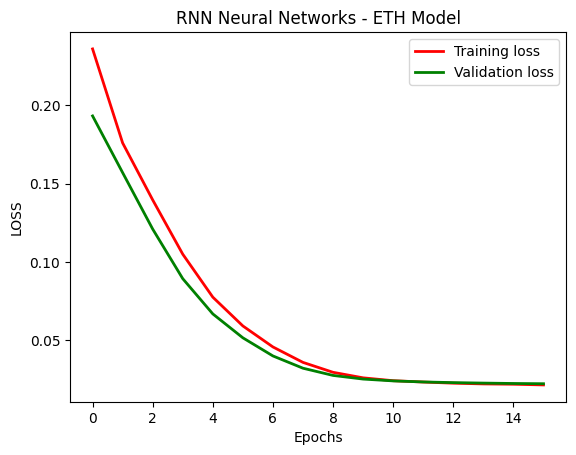

In [17]:
# Plot the training and validation loss

plt.plot(modelfit.history['loss'], 'r', linewidth=2, label='Training loss')
plt.plot(modelfit.history['val_loss'], 'g', linewidth=2, label='Validation loss')
plt.title('RNN Neural Networks - ETH Model')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend()  # Add a legend to identify the lines
plt.show()

In [18]:
import tensorflow as tf
model = tf.keras.models.load_model(checkpoint_filepath)
results = model.evaluate(X_test)
print(f'{model.metrics_names}: {results}')

7/7 [==============================] - 0s 2ms/step - loss: 0.0187 - accuracy: 0.0000e+00
['loss', 'accuracy']: [0.01868305914103985, 0.0]


In [19]:
preds = model.predict(X_test).squeeze()  # Generate predictions
mae = mean_absolute_error(preds, y_test)  # Calculate MAE
print("Mean Absolute Error:", mae)

7/7 [==============================] - 0s 2ms/step
Mean Absolute Error: 0.06023350804437724


In [20]:
from sklearn.metrics import mean_squared_error
SCORE_RMSE=mean_squared_error(preds, y_test, squared= False)
print('SCORE_RMSE :', SCORE_RMSE)

SCORE_RMSE : 0.06026857164020066


In [22]:
def line_plot2(y_actual_values, y_predict_values, mae_values, close_times, metric_str ='RMSE'):

    # Plot the line graph with each second as a data point
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot actual and predicted values
    ax1.plot(close_times, y_actual_values, label='Actual', marker='o', linestyle='-', markersize=1)
    ax1.plot(close_times, y_predict_values, label='Predicted', marker='x', linestyle='-', markersize=1)

    # Set labels and title for the first y-axis
    ax1.set_xlabel('Close Time')
    ax1.set_ylabel('Values', color='black')
    ax1.set_title('Actual vs Predicted Values over Time')

    # Show legend for the first y-axis
    ax1.legend(loc='upper left')

    # Create a second y-axis for MAE values
    # ax2 = ax1.twinx()
    # ax2.plot(close_times, mae_values, label=metric_str, marker='x', linestyle=(0, (1, 1)), color='red', markersize=1, alpha= 0.5)

    # Set labels and title for the second y-axis
    # ax2.set_ylabel(metric_str, color='red')

    # Show legend for the second y-axis
    # ax2.legend(loc='upper right')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Set the x-axis format to show date and time
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

    # Show the plot
    plt.show()

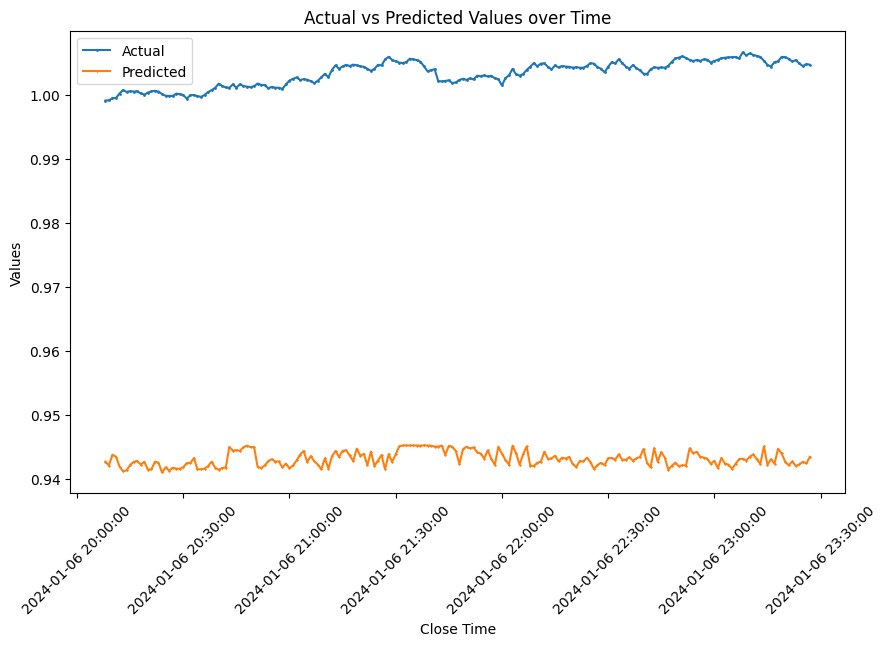

In [23]:
line_plot2(list(y_test['close']), list(preds), SCORE_RMSE, test_ind)

25/25 [==============================] - 0s 2ms/step


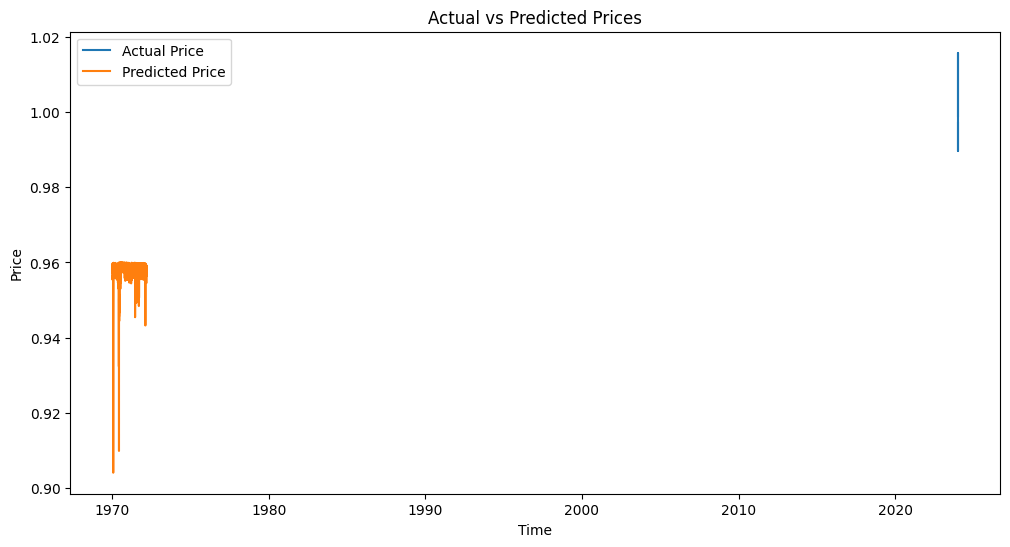

In [46]:
# # Generate predictions
# preds = model.predict(X_test).squeeze()

# # Plot actual vs predicted prices
# plt.figure(figsize=(12, 6))  # Adjust figure size as needed
# plt.plot(y_test, label='Actual Price')
# plt.plot(preds, label='Predicted Price')
# plt.title('Actual vs Predicted Prices')
# plt.xlabel('Time')  # Assuming time-based data
# plt.ylabel('Price')
# plt.legend()
# plt.show()

In [ ]:
# prediction = np.array([2575.391602,2590.087891,2314.719238,26126395392])

In [274]:
# arr = np.array([1,2,3])
# ret = arr / arr[0] + 2

In [278]:
# m = arr.mean()
# sd = arr.std()
# sd

0.816496580927726

In [279]:
# ret

array([3., 4., 5.])